In [2]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline 
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
res = pd.read_csv('C:/ds_work/data/titanic.csv')
res.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#print(help(titanic.corr))

In [4]:
#1) 타이타닉의 상관관계를 살펴보자.
titanic.corr(method='pearson')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,n_age
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.557080,-0.203367,-0.050972
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.094035,0.135207,-0.339610
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.253236,0.179775,0.968798
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.253586,-0.584471,-0.226973
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.349943,-0.583398,-0.158376
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182024,-0.271832,0.099775
adult_male,-0.557080,0.094035,0.253236,-0.253586,-0.349943,-0.182024,1.000000,0.404744,0.223328
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.404744,1.000000,0.155648
n_age,-0.050972,-0.339610,0.968798,-0.226973,-0.158376,0.099775,0.223328,0.155648,1.000000


In [5]:
#2)타이타닉의 상관관계 계수값을 리턴받아보자.
#survived, adult_male 에 대한 상관 계수

titanic['survived'].corr(titanic['adult_male'],method='pearson')

-0.5570800422053258

In [5]:
#Q3)성별에 대한 생존률 관계를 생각해보자.(남,녀) : 중복컬럼 제거, 결측치 처리(삭제 or 중간값), 수치화
#데이터 전체를 확인 후 문자열이 있으면 수치화가 되어야 한다.
#male = 1, female=0
#특정열의 값을 변경 ->df['열이음'].map(dict type)
titanic['sex']=titanic['sex'].map({'male':1,'female':0})
titanic

#리플레쉬해야함,,

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
titanic.head()
titanic['survived'].corr(titanic['sex'],method='pearson')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


-0.543351380657755

In [9]:
#4)apply() 특정렬/모든열의 값을 변경하자. df['열이름'].apply(사용자정의함수,axis=0)
titanic

age_mean = titanic['age'].mean()
titanic['age'].fillna(age_mean,inplace=True)

def r_age(x):
    res = int(x//10)*10
    return res

titanic['n_age']=titanic['age'].apply(r_age)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,n_age
0,0,3,1,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20
1,1,1,0,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30
2,1,3,0,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20
3,1,1,0,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30
4,0,3,1,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,20
887,1,1,0,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,10
888,0,3,0,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,20
889,1,1,1,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,20


In [13]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,n_age
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30


In [14]:
#5)pd.cut(데이터, 구간개수, 레이블명): 수치형 데이터를 특정구간을 나눌 때 사용
titanic['age_class']=pd.cut(titanic['age'],3,labels=['child','young','old'])
titanic[['age','age_class']].head()

,age,age_class
0,22.0,child
1,38.0,young
2,26.0,child
3,35.0,young
4,35.0,young


In [15]:
#6) 구간을 나누어서 개수를 확인
titanic['age_class'].value_counts()

young    522
child    319
old       50
Name: age_class, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

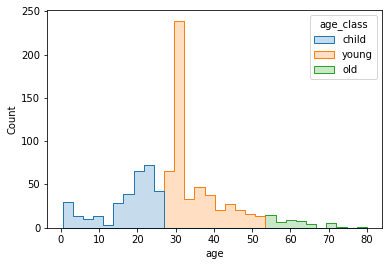

In [18]:
#6) 구간을 나눈 결과로 시각화를 확인
#hue : 변수가 가질 수 있는 값에 따라 다시 경우를 나누어 세고싶을 떄
#->age 중에서도 age_class로 다시 경우를 나누어 세고있음
sns.histplot(data=titanic, x='age',hue='age_class',element='step')

In [20]:
#8)qcut() : 동일한 개수로 구간을 나눈다.

#pd.pcut(데이터, 구간개수, 레이블명)

titanic['age_class_q']=pd.qcut(titanic['age'],3,labels=['child','young','old'])
titanic[['age','age_class_q']].head()

,age,age_class_q
0,22.0,child
1,38.0,old
2,26.0,young
3,35.0,old
4,35.0,old


In [21]:
titanic['age_class_q'].value_counts()

young    304
child    301
old      286
Name: age_class_q, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

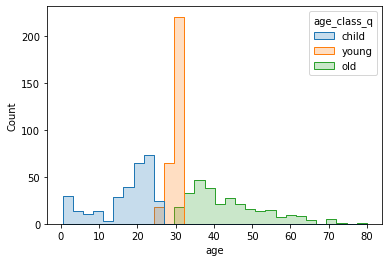

In [17]:
sns.histplot(data=titanic, x='age',hue='age_class_q',element='step')

## 시각화

In [27]:
movie_df = pd.read_csv('C:\ds_work\data\movies_train.csv')
movie_df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [28]:
#1)천만 관중을 달성한 영화를 그래프로 확인 하자.
# 영화제목과 관중 수를 출력 해보자.
천만_df=movie_df[movie_df['box_off_num']>=10000000][['title','box_off_num']]
천만_df

,title,box_off_num
122,변호인,11374879
362,도둑들,12983841
372,국제시장,14262766
460,"광해, 왕이 된 남자",12323595
498,암살,12706663
530,7번방의 선물,12811435


<Figure size 720x432 with 0 Axes>

<BarContainer object of 6 artists>

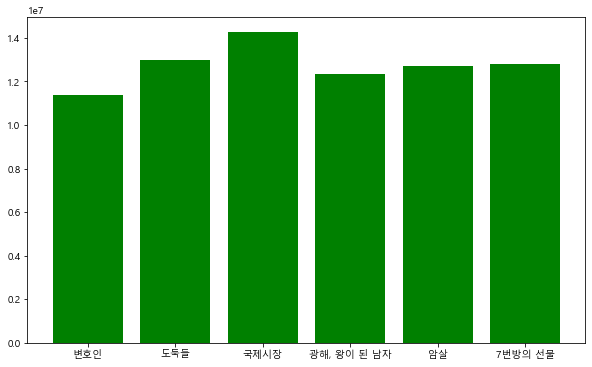

In [29]:
plt.figure(figsize=(10,6))
plt.rc('font',family='Malgun Gothic')
plt.bar(천만_df['title'],천만_df['box_off_num'],color='g')

In [30]:
import matplotlib.font_manager as fm#폰트확인
font_list=[font.name for font in fm.fontManager.ttflist]#설치된 폰트 확인
font_list
plt.rcParams['font.family']='Malgun Gothic'#폰트변경

['STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans',
 'cmex10',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'cmr10',
 'DejaVu Sans',
 'cmss10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXNonUnicode',
 'cmsy10',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'cmmi10',
 'STIXSizeThreeSym',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'DejaVu Serif Display',
 'STIXGeneral',
 'cmb10',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Sans Display',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'cmtt10',
 'Courier New',
 'Verdana',
 'Cambria',
 'Microsoft YaHei',
 'Arial',
 'Mongolian Baiti',
 'Times New Roman',
 'Consolas',
 'Palatino Linotype',
 'Calibri',
 'Constantia',
 'Microsoft YaHei',
 'Georgia',
 'Microsoft Himalaya',
 'SimSun',
 'Segoe UI',
 'Nirmala UI',
 'Constantia',
 'Yu Gothic',
 'Impact',
 'Georgia',
 'Cambria',
 'Leelawadee

In [31]:
#2)장르별 관객 수의 평균을 구해서 bar 차트를 만들어 보자.

res=movie_df.groupby('genre')['box_off_num'].mean()
res02=res.reset_index()
res02

,genre,box_off_num
0,SF,1.788346e+06
1,공포,5.908325e+05
2,느와르,2.263695e+06
3,다큐멘터리,6.717226e+04
4,드라마,6.256898e+05
5,멜로/로맨스,4.259680e+05
6,뮤지컬,6.627000e+03
7,미스터리,5.275482e+05
8,서스펜스,8.261100e+04
9,애니메이션,1.819267e+05


<Figure size 720x432 with 0 Axes>

<BarContainer object of 12 artists>

Text(0.5, 1.0, '장르별 관객 수 평균')

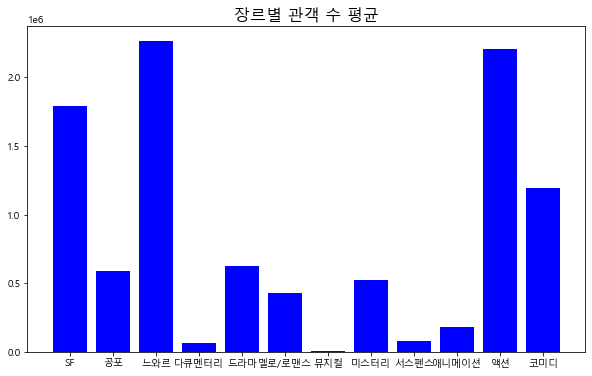

In [32]:
plt.figure(figsize=(10,6))
plt.rc('font',family='Malgun Gothic')
plt.bar(res02['genre'],res02['box_off_num'],color='b')

plt.title("장르별 관객 수 평균",fontsize=16)


In [33]:
#3)년도별 최대 관객 수

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [34]:
movie_df['r_date']=pd.to_datetime(movie_df['release_time'])
movie_df.head()
movie_df['year']=movie_df['r_date'].dt.year
movie_df.head()



,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,r_date
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012-11-22
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015-11-19
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013-06-05
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012-07-12
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010-11-04


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,r_date,year
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012-11-22,2012
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015-11-19,2015
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013-06-05,2013
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012-07-12,2012
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010-11-04,2010


In [38]:
year_max=movie_df.groupby('year')['box_off_num'].max()
year_max=year_max.reset_index()
year_max

,year,box_off_num
0,2010,6178665
1,2011,7482180
2,2012,12983841
3,2013,12811435
4,2014,14262766
5,2015,12706663


Text(0.5, 1.0, '년도별 최대 관중수')

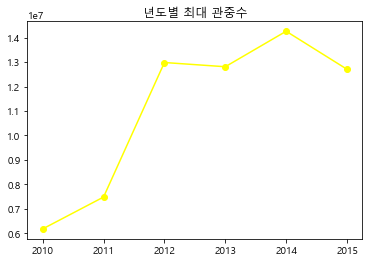

In [39]:
plt.plot(year_max['year'],year_max['box_off_num'],color='yellow',marker='o')
plt.title('년도별 최대 관중수')

,year,box_off_num
0,2010,46
1,2011,36
2,2012,10
3,2013,205
4,2014,1
5,2015,8


Text(0.5, 1.0, '년도별 최소 관중수')

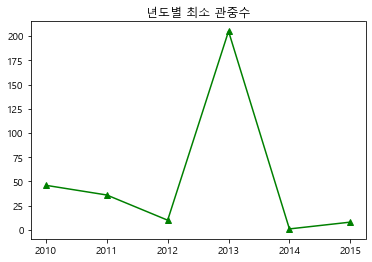

In [40]:
year_min=movie_df.groupby('year')['box_off_num'].min()
year_min=year_min.reset_index()
year_min
plt.plot(year_min['year'],year_min['box_off_num'],color='g',marker='^')
plt.title('년도별 최소 관중수')

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '년도별 최대 관중수')

<AxesSubplot:>

Text(0.5, 1.0, '년도별 최소 관중수')

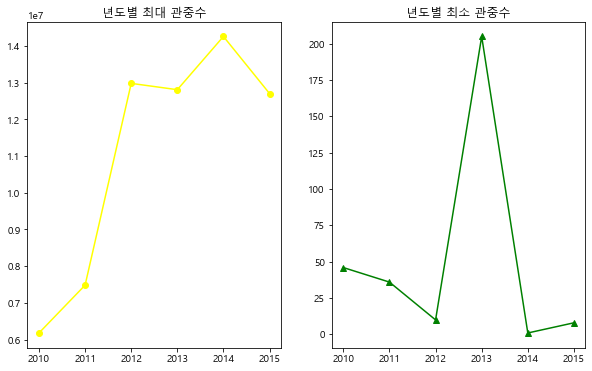

In [41]:
#년도별 최대관중수와 최소관중수의 그래프를 하나의 화면으로 출력 해보자.
plt.figure(figsize=(10,6))
#1번에 2칸 1번쨰
plt.subplot(1,2,1)
plt.plot(year_max['year'],year_max['box_off_num'],color='yellow',marker='o')
plt.title('년도별 최대 관중수')
#1분에 2칸 2번쨰
plt.subplot(1,2,2)
plt.plot(year_min['year'],year_min['box_off_num'],color='g',marker='^')
plt.title('년도별 최소 관중수')

In [42]:
#4)영화 스태프 수의 분포도를 살펴보자.

staff=movie_df['num_staff']
staff.info()
staff.describe()
staff

<class 'pandas.core.series.Series'>
RangeIndex: 600 entries, 0 to 599
Series name: num_staff
Non-Null Count  Dtype
--------------  -----
600 non-null    int64
dtypes: int64(1)
memory usage: 4.8 KB


count    600.000000
mean     151.118333
std      165.654671
min        0.000000
25%       17.000000
50%       82.500000
75%      264.000000
max      869.000000
Name: num_staff, dtype: float64

0       91
1      387
2      343
3       20
4      251
      ... 
595    510
596    286
597    123
598    431
599    363
Name: num_staff, Length: 600, dtype: int64

(array([304.,  89.,  51.,  69.,  46.,  23.,   9.,   6.,   1.,   2.]),
 array([  0. ,  86.9, 173.8, 260.7, 347.6, 434.5, 521.4, 608.3, 695.2,
        782.1, 869. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, '스텝 인원수 분포')

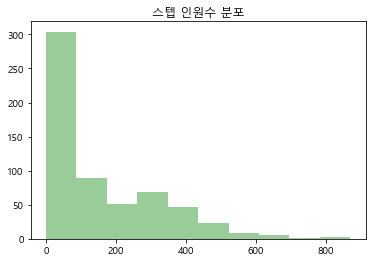

In [46]:
plt.hist(staff,color='g',alpha=0.4)
plt.title('스텝 인원수 분포')

In [48]:
#5)영화 등급 비율을 그래프로 나타내보자
screening_rat=movie_df['screening_rat'].value_counts()
screening_rat

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

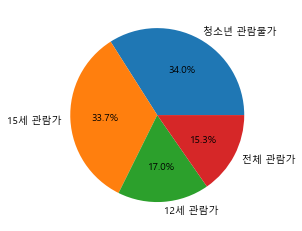

In [49]:
plt.pie(screening_rat,labels=screening_rat.keys(),autopct='%1.1f%%');

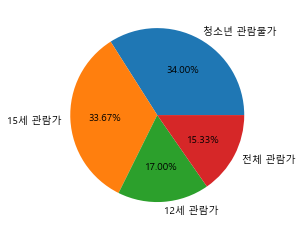

In [52]:
plt.pie(screening_rat,labels=screening_rat.keys(),autopct='%1.2f%%');